# CROP PREDICTION SYSTEM

Develop a machine learning model for crop yield prediction in Maharashtra, leveraging historical data of rainfall, temperature, area and production. The system aims to forecast crop yield by analyzing the correlation between the environmental factors and crop yield of previous years, contributing to informed agricultural decision-making, aiding farmers in making informed decisions for optimal crop cultivation.

In [ ]:
#importing required libraries
import pandas as pd
import numpy as np

#Loading dataset into dataframe
df = pd.read_csv('final_crop.csv')
df

,Unnamed: 0,Year,Dist Name,Crop,Area(1000 ha),Production(1000 tons),Yield(Kg per ha),Total Rainfall,Avg Temp
0,9039,1997,Ahmednagar,RICE,10.30,12.60,1223.30,261.000000,20.586875
1,9041,1997,Ahmednagar,KHARIF SORGHUM,5.50,6.70,1218.18,261.000000,20.586875
2,9044,1997,Ahmednagar,PEARL MILLET,343.30,191.40,557.53,261.000000,20.586875
3,9045,1997,Ahmednagar,MAIZE,10.40,15.60,1500.00,261.000000,20.586875
4,9046,1997,Ahmednagar,FINGER MILLET,3.60,2.90,805.56,261.000000,20.586875
...,...,...,...,...,...,...,...,...,...
15171,57265,2017,Yeotmal,SUNFLOWER,0.00,0.00,500.00,417.188235,20.895974
15172,57266,2017,Yeotmal,SOYABEAN,254.50,206.30,810.61,417.188235,20.895974
15173,57267,2017,Yeotmal,OILSEEDS,0.00,0.00,0.00,417.188235,20.895974
15174,57268,2017,Yeotmal,SUGARCANE,14.13,59.33,4199.76,417.188235,20.895974


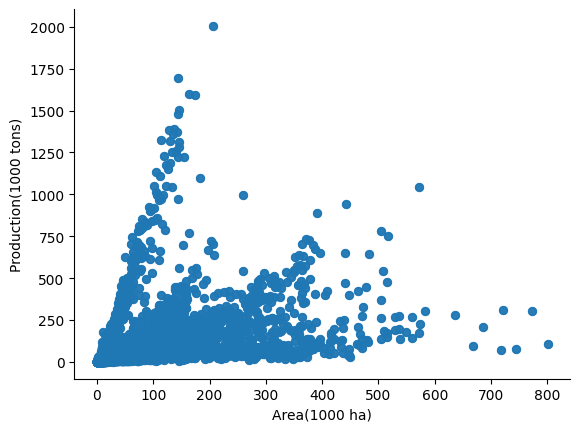

In [ ]:
# @title Area(1000 ha) vs Production(1000 tons)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Area(1000 ha)', y='Production(1000 tons)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df = df.drop(df.columns[[0]], axis=1)

In [ ]:
# checking null values in data
df.isnull()

,Year,Dist Name,Crop,Area(1000 ha),Production(1000 tons),Yield(Kg per ha),Total Rainfall,Avg Temp
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
15171,False,False,False,False,False,False,False,False
15172,False,False,False,False,False,False,False,False
15173,False,False,False,False,False,False,False,False
15174,False,False,False,False,False,False,False,False


In [ ]:
# total null values present in dataset in specific columns
df.isnull().sum()

Year                        0
Dist Name                   0
Crop                        0
Area(1000 ha)               0
Production(1000 tons)       0
Yield(Kg per ha)            0
Total Rainfall           2800
Avg Temp                 2800
dtype: int64

In [ ]:
# finding mean value to fill in place of null
mean_value = df.mean()
mean_value

<ipython-input-60-10c872c80683>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_value = df.mean()


Year                     2006.942804
Area(1000 ha)              48.958076
Production(1000 tons)      58.656556
Yield(Kg per ha)         1111.257230
Total Rainfall            763.782805
Avg Temp                   21.710196
dtype: float64

In [ ]:
df['Crop'].value_counts()

RICE              1084
KHARIF SORGHUM    1084
PEARL MILLET      1084
MAIZE             1084
FINGER MILLET     1084
PIGEONPEA         1084
MINOR PULSES      1084
GROUNDNUT         1084
SESAMUM           1084
SUNFLOWER         1084
SOYABEAN          1084
OILSEEDS          1084
SUGARCANE         1084
COTTON            1084
Name: Crop, dtype: int64

In [ ]:
df['Dist Name'].value_counts()

Ahmednagar    588
Akola         588
Wardha        588
Thane         588
Solapur       588
Satara        588
Sangli        588
Ratnagiri     588
Raigad        588
Pune          588
Parbhani      588
Osmanabad     588
Nasik         588
Nanded        588
Nagpur        588
Kolhapur      588
Jalgaon       588
Dhule         588
Chandrapur    588
Buldhana      588
Bhandara      588
Beed          588
Aurangabad    588
Amarawati     588
Yeotmal       588
Bombay        476
Name: Dist Name, dtype: int64

In [ ]:
# replacing null values in total rain column with average rain
avg_rain = df['Total Rainfall'].mean()
df['Total Rainfall'].fillna(value=avg_rain, inplace=True)

In [ ]:
# replacing null values in average temp column with average temperature
avg_temp = df['Avg Temp'].mean()
df['Avg Temp'].fillna(value=avg_temp, inplace=True)

In [ ]:
# checking if any null values remain
df.isnull().sum()

Year                     0
Dist Name                0
Crop                     0
Area(1000 ha)            0
Production(1000 tons)    0
Yield(Kg per ha)         0
Total Rainfall           0
Avg Temp                 0
dtype: int64

In [ ]:
# Returning shape of array
df.shape

(15176, 8)

In [ ]:
# Returning descriptive statistics about the data
df.describe()

,Year,Area(1000 ha),Production(1000 tons),Yield(Kg per ha),Total Rainfall,Avg Temp
count,15176.000000,15176.000000,15176.000000,15176.000000,15176.000000,15176.000000
mean,2006.942804,48.958076,58.656556,1111.257230,763.782805,21.710196
std,6.039619,85.748280,137.451446,1783.270684,480.534407,0.951026
min,1997.000000,0.000000,0.000000,0.000000,0.000000,19.480000
25%,2002.000000,0.400000,0.230000,230.770000,458.100000,20.895974
50%,2007.000000,9.900000,7.400000,586.750000,696.950000,21.710196
75%,2012.000000,59.400000,54.622500,1200.000000,776.600000,22.380000
max,2017.000000,800.890000,2004.970000,17873.740000,2992.800000,23.962187


In [ ]:
# Calculating the relationship between each column in dataset
df.corr()

<ipython-input-68-ae36bba0cf6e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,Area(1000 ha),Production(1000 tons),Yield(Kg per ha),Total Rainfall,Avg Temp
Year,1.000000,0.025322,0.058835,-0.002787,-0.145432,-0.080856
Area(1000 ha),0.025322,1.000000,0.506980,0.027805,-0.097001,0.006838
Production(1000 tons),0.058835,0.506980,1.000000,0.568104,-0.022087,-0.103841
Yield(Kg per ha),-0.002787,0.027805,0.568104,1.000000,-0.032539,-0.097043
Total Rainfall,-0.145432,-0.097001,-0.022087,-0.032539,1.000000,0.291399
Avg Temp,-0.080856,0.006838,-0.103841,-0.097043,0.291399,1.000000


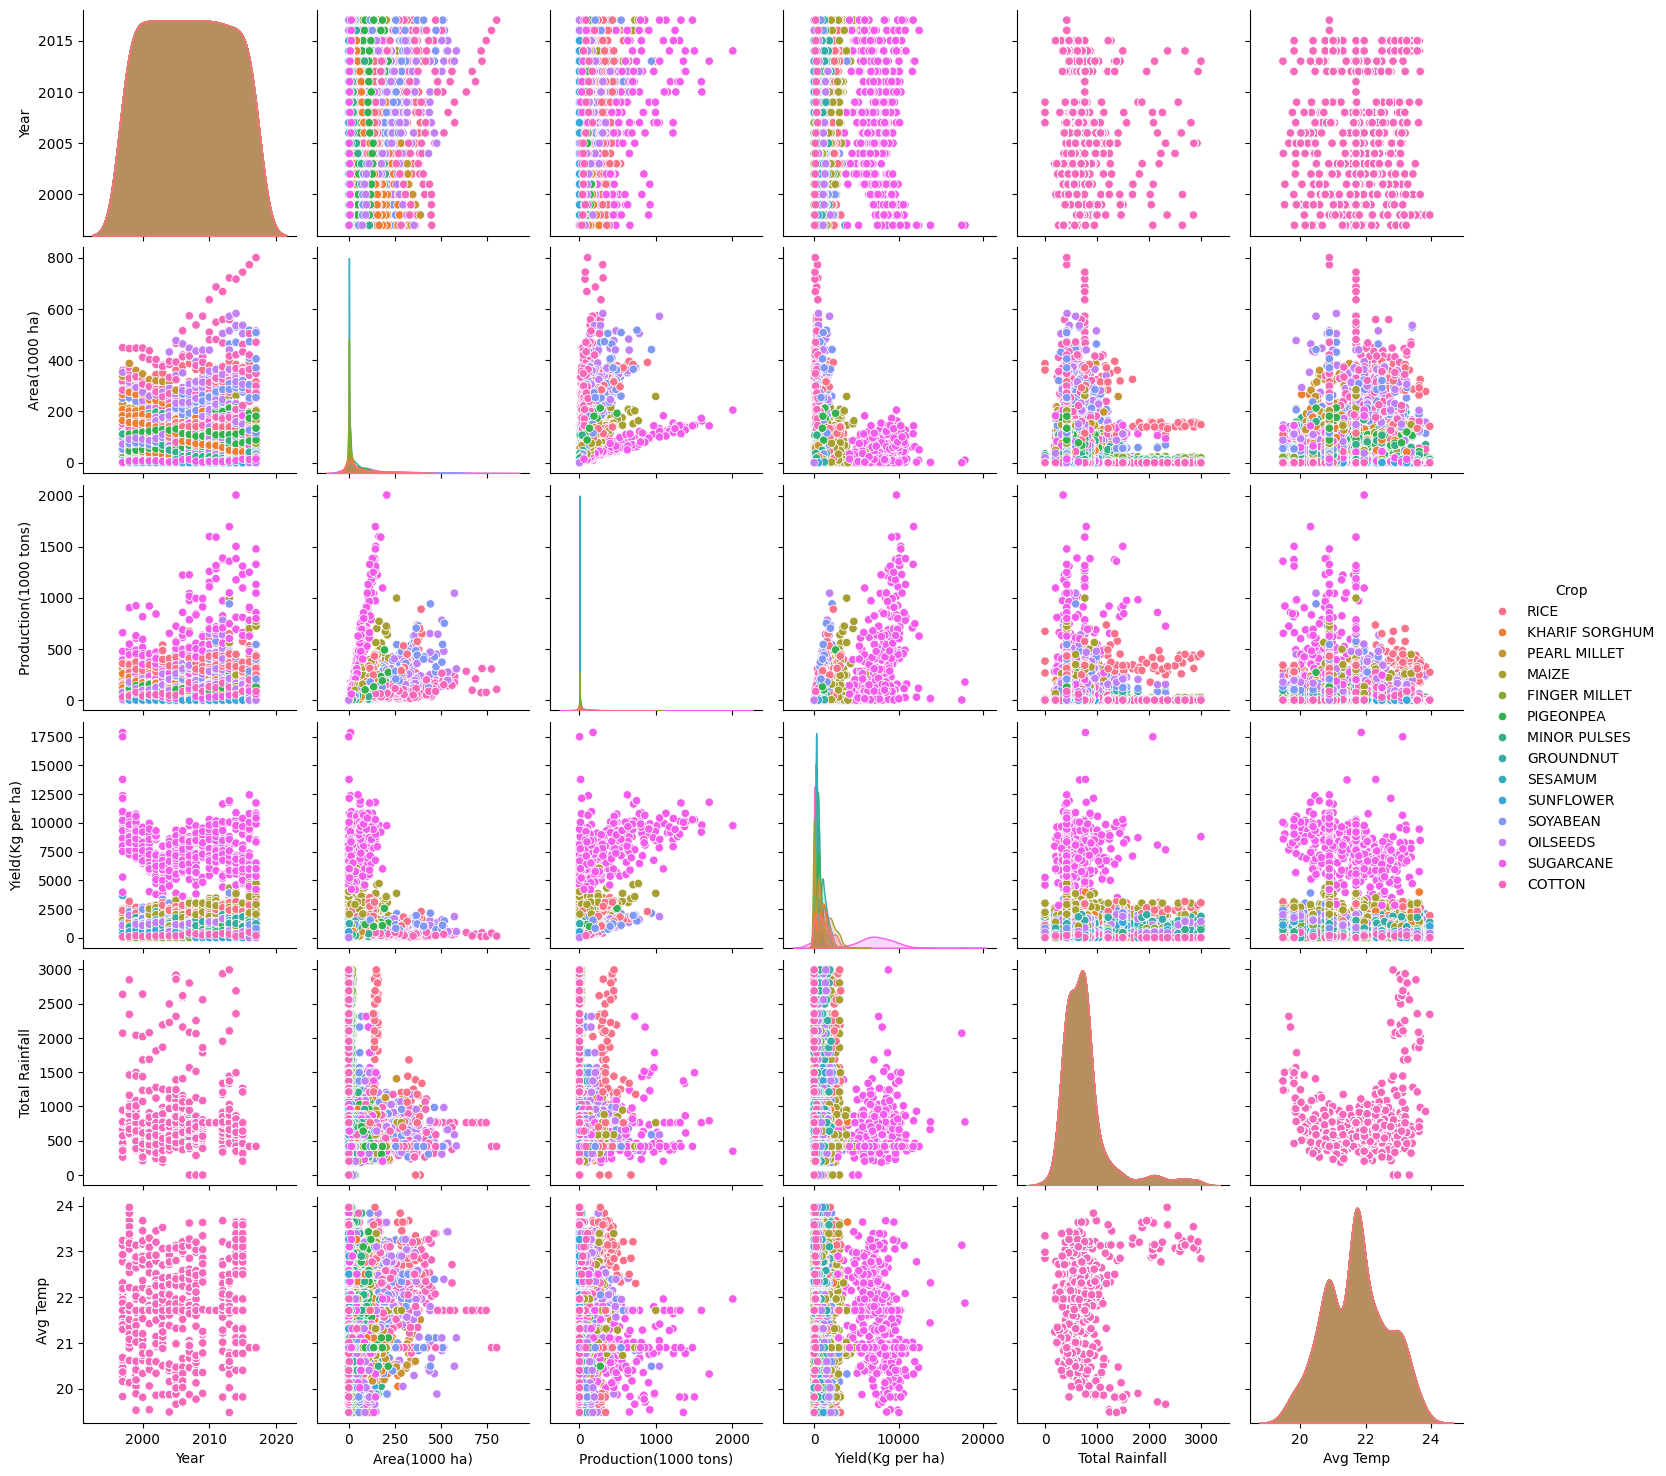

In [ ]:
# Visualizing the features
import seaborn as sns
ax = sns.pairplot(df, hue='Crop')
ax

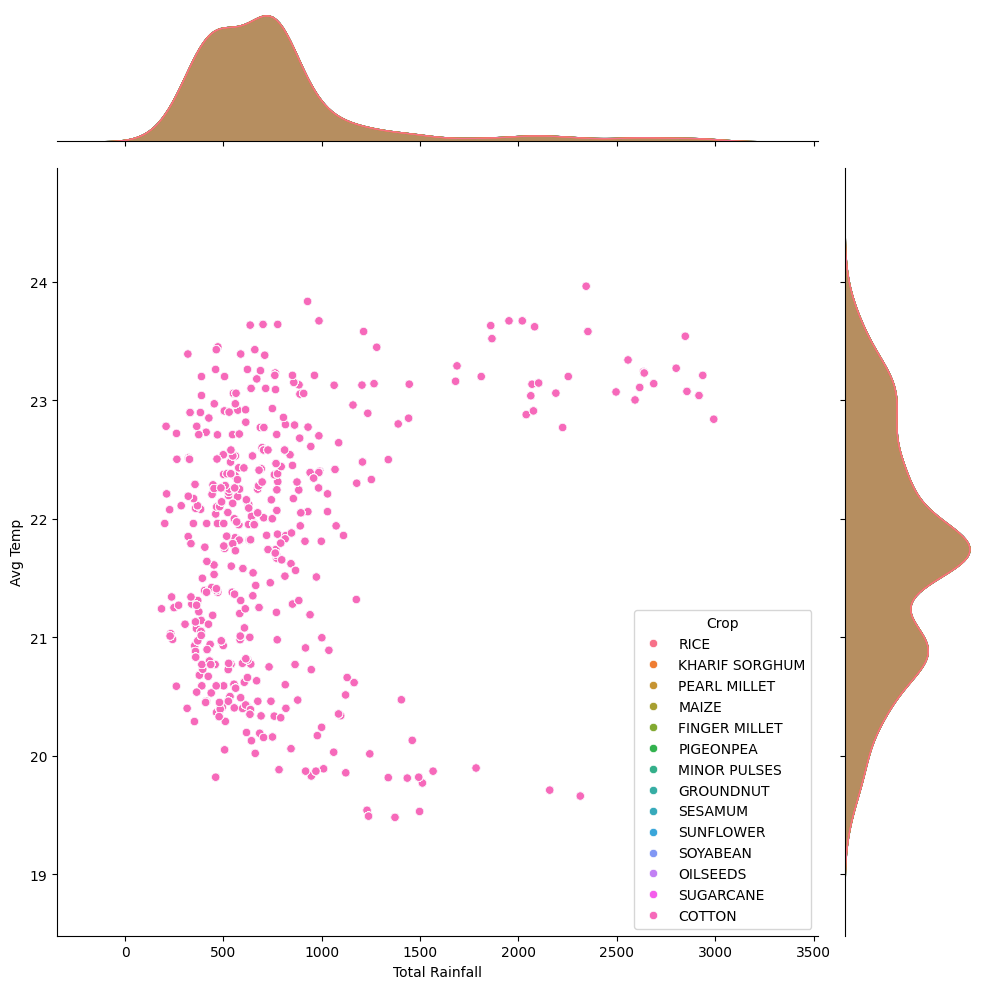

In [ ]:
sns.jointplot(x="Total Rainfall",y="Avg Temp",data=df[(df['Avg Temp']<40) & (df['Total Rainfall']>40)],height=10,hue="Crop")

<ipython-input-71-02cadfa453ce>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True,cmap='magma')


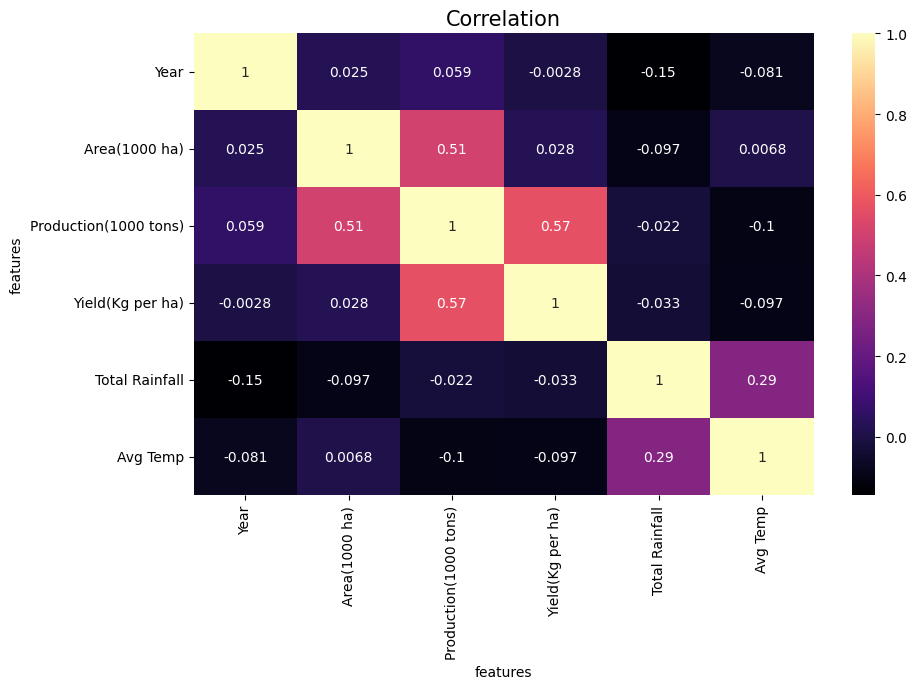

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.heatmap(df.corr(), annot=True,cmap='magma')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation', fontsize = 15, c='black')
plt.show()

In [ ]:
# Creating dummy variables from categorical variables
dummy = pd.get_dummies(df)
dummy

,Year,Area(1000 ha),Production(1000 tons),Yield(Kg per ha),Total Rainfall,Avg Temp,Dist Name_Ahmednagar,Dist Name_Akola,Dist Name_Amarawati,Dist Name_Aurangabad,...,Crop_MAIZE,Crop_MINOR PULSES,Crop_OILSEEDS,Crop_PEARL MILLET,Crop_PIGEONPEA,Crop_RICE,Crop_SESAMUM,Crop_SOYABEAN,Crop_SUGARCANE,Crop_SUNFLOWER
0,1997,10.30,12.60,1223.30,261.000000,20.586875,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1997,5.50,6.70,1218.18,261.000000,20.586875,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1997,343.30,191.40,557.53,261.000000,20.586875,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1997,10.40,15.60,1500.00,261.000000,20.586875,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1997,3.60,2.90,805.56,261.000000,20.586875,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15171,2017,0.00,0.00,500.00,417.188235,20.895974,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
15172,2017,254.50,206.30,810.61,417.188235,20.895974,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15173,2017,0.00,0.00,0.00,417.188235,20.895974,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
15174,2017,14.13,59.33,4199.76,417.188235,20.895974,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# @title Splitting dataset into train and test dataset
from sklearn.model_selection import train_test_split

x = dummy.drop(["Yield(Kg per ha)"], axis=1)
y = dummy["Yield(Kg per ha)"]

# Splitting data set - 25% test dataset and 75%

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=5)

print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (11382, 45)
x_test : (3794, 45)
y_train : (11382,)
y_test : (3794,)


In [ ]:
print(y)

0        1223.30
1        1218.18
2         557.53
3        1500.00
4         805.56
          ...   
15171     500.00
15172     810.61
15173       0.00
15174    4199.76
15175     182.76
Name: Yield(Kg per ha), Length: 15176, dtype: float64


In [ ]:
print(x_train)

       Year  Area(1000 ha)  Production(1000 tons)  Total Rainfall   Avg Temp  \
279    1997           92.6                  15.83      359.000000  22.088125   
8902   2009            1.5                   7.87        0.000000  23.340000   
10261  2011          187.4                  45.94      763.782805  21.710196   
6374   2005           21.1                  25.10     2917.900000  23.040000   
1961   1999            0.0                   0.00      763.782805  21.710196   
...     ...            ...                    ...             ...        ...   
3046   2001            6.0                   1.30      538.800000  20.771250   
9917   2010           96.7                  61.85      763.782805  21.710196   
4079   2002          152.5                  88.20      369.700000  20.970000   
2254   2000            8.9                   4.40      674.300000  22.250000   
2915   2001           20.2                  34.50      429.600000  20.800000   

       Dist Name_Ahmednagar  Dist Name_

In [ ]:
# @title Linear regression
# Training the Simple Linear Regression model .

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
# Predicting Result
lr_predict = linear_model.predict(x_test)
lr_predict

array([1587.06323242, 6048.86547852,  278.36962891, ...,  256.72851562,
        -94.5703125 , 1295.99731445])

In [ ]:
linear_model.score(x_test,y_test)

0.7707697370795498

In [ ]:
# Calculating R2 score
from sklearn.metrics import r2_score
r = r2_score(y_test,lr_predict)
print("R2 score : ",r)

R2 score :  0.7707697370795498


Text(0.5, 1.0, 'Linear Regression')

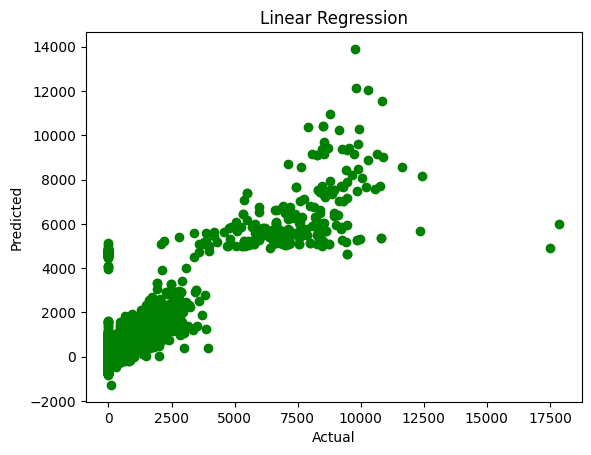

In [ ]:
# Plotting scatterplot
plt.scatter(y_test,lr_predict, color='green')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')

Text(0.5, 1.0, 'Linear Regression')

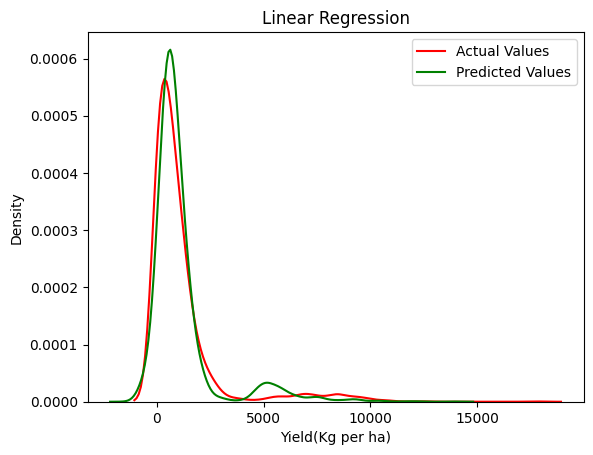

In [ ]:
ax = sns.kdeplot(y_test, color = "r", label = 'Actual Values')
sns.kdeplot(lr_predict, color = "green", label = 'Predicted Values', ax = ax)
plt.legend()
plt.title('Linear Regression')

In [ ]:
import numpy as np
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import r2_score

classifiers = [
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]

for clf in classifiers:
    print(clf)
    clf.fit(x_train, y_train)

    # Predicting on the test set
    y_pred = clf.predict(x_test)

    # Calculating R^2 score
    r2 = r2_score(y_test, y_pred)

    print("R^2 Score:", r2)
    print('\n')


BayesianRidge()
R^2 Score: 0.7707570317114419


LassoLars()
R^2 Score: 0.7705520212024227


ARDRegression()
R^2 Score: 0.7708895661017576


TheilSenRegressor()
R^2 Score: 0.7619665118924074


LinearRegression()
R^2 Score: 0.7707697370795498




In [ ]:
# @title RandomForest
from sklearn.ensemble import RandomForestRegressor
random_model = RandomForestRegressor(n_estimators = 18)
random_model.fit(x_train,y_train)

#Predicting Result
rf_predict = random_model.predict(x_test)
rf_predict

array([1234.83333333, 7572.13611111,    0.        , ...,    0.        ,
        643.39666667,  809.68666667])

In [ ]:
# Calculating R2 score

from sklearn.metrics import r2_score
r1 = r2_score(y_test,rf_predict)
print("R2 score : ",r1)

R2 score :  0.9881332860107229


In [ ]:
# Calculating Adj. R2 score:

Adjr2_1 = 1 - (1-r)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_1))

Adj. R-Squared : 0.7680175060679648


Text(0.5, 1.0, 'Random Forest Regression')

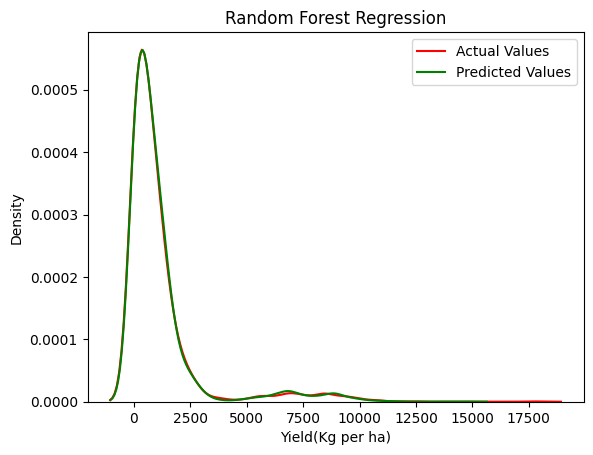

In [ ]:
ax = sns.kdeplot(y_test, color = "r", label = 'Actual Values')
sns.kdeplot(rf_predict, color = "green", label = 'Predicted Values', ax = ax)
plt.legend()
plt.title('Random Forest Regression')

###Comparison between Linear Regression Algorithm and Random Forest Algorithm

Linear regression algorithm is not at all accurate for this kind of prediction.
Random Forest Algorithm has higher accuracy ( between 95 % to 99% ), but it is slow.

In [ ]:
# @title Decision Tree
# Training model
from sklearn.tree import DecisionTreeRegressor
dec_model = DecisionTreeRegressor(random_state = 14)
dec_model.fit(x_train,y_train)

# Predicting results
decisiontree_predict = dec_model.predict(x_test)
decisiontree_predict

array([1199.41, 7565.85,    0.  , ...,    0.  ,  654.55,  747.51])

In [ ]:
# Calculating R2 score :

from sklearn.metrics import r2_score
r2 = r2_score(y_test,decisiontree_predict)
print("R2 score : ",r2)

R2 score :  0.9888444460019239


In [ ]:
# Calculating Adj. R2 score:

Adjr2_2 = 1 - (1-r)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_2))

Adj. R-Squared : 0.7680175060679648


Text(0.5, 1.0, 'Decision Tree Regression')

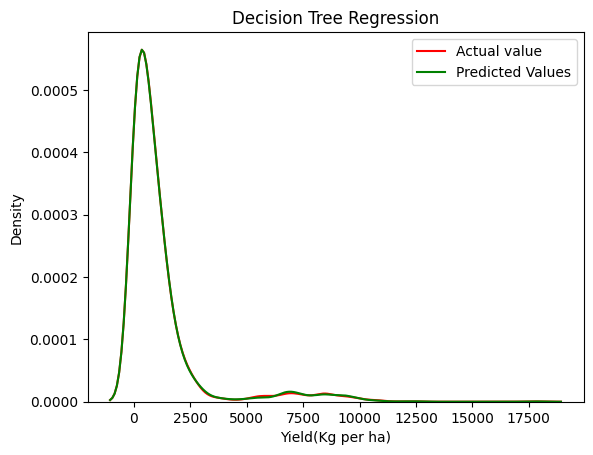

In [ ]:
ax = sns.kdeplot(y_test, color = "r", label = "Actual value ")
sns.kdeplot(decisiontree_predict, color = "g", label = "Predicted Values", ax = ax)
plt.legend()
plt.title('Decision Tree Regression')

The Accuracy of Decision Tree lies between 95-99%

In [ ]:
# @title Cross-validation of Linear Regression
from sklearn.model_selection import cross_val_score
lr_model = linear_model.LinearRegression()
lr_model.fit(x_train,y_train)
accuracies = cross_val_score(estimator = lr_model, X = x_train, y=y_train, cv = 10)

In [ ]:
a = (accuracies.mean()*100)
b = (accuracies.std()*100)

In [ ]:
# Mean Accuracy and SD of 10 fold results

print("Accuracy : {:.2f}%".format (a))
print("Standard Deviation : {:.2f}%".format(b))

Accuracy : 77.23%
Standard Deviation : 3.42%


In [ ]:
# @title Cross-validation of Random Forest
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = random_model, X = x_train, y=y_train, cv = 10)

In [ ]:
a1 = (accuracies.mean()*100)
b1 = (accuracies.std()*100)

In [ ]:
# Mean Accuracy and SD of 10 fold results

print("Accuracy : {:.2f}%".format (accuracies.mean()*100))
print("Standard Deviation : {:.2f}%".format(accuracies.std()*100))

Accuracy : 98.15%
Standard Deviation : 0.62%


In [ ]:
# Calculating Errors
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(rf_predict,y_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rf_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rf_predict)))

Mean Absolute Error: 65.23142139635682
Mean Squared Error: 39868.370371219906
Root Mean Squared Error: 199.67065475732758


In [ ]:
# @title Cross-validation of Decision Tree
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = dec_model, X = x_train, y=y_train)

In [ ]:
a2 = (accuracies.mean()*100)
b2 = (accuracies.std()*100)

In [ ]:
# Accuracy and Standard Deviation
print("Accuracy : {:.2f}%".format (accuracies.mean()*100))
print("Standard Deviation : {:.2f}%".format(accuracies.std()*100))

Accuracy : 96.92%
Standard Deviation : 1.07%


Text(0.5, 1.0, 'Comparing Predicting values of algorithms')

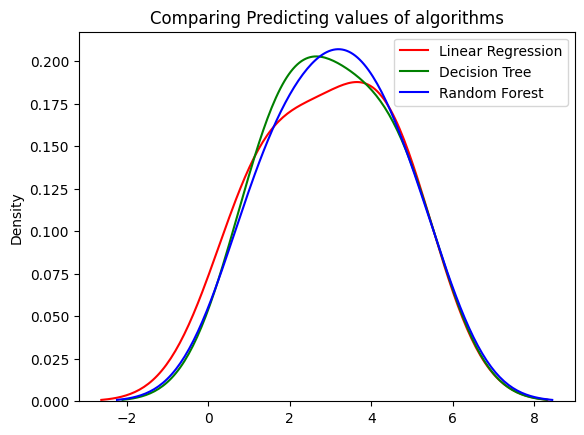

In [ ]:
# @title Comparing Predicting values of algorithms
ax1 = sns.kdeplot(lr_predict, color = "r", label = "Linear Regression")
ax2 = sns.kdeplot(decisiontree_predict, color = "g", label = "Decision Tree")
ax3 = sns.kdeplot(rf_predict, color = "b", label = "Random Forest")
plt.legend()
plt.title('Comparing Predicting values of algorithms')

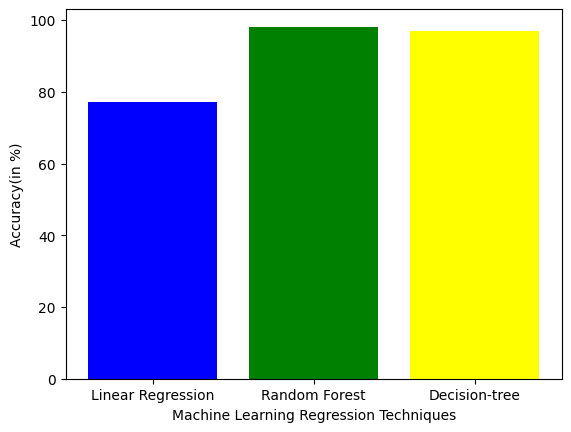

In [ ]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt

# create a dataset
Algorithms = ['Linear Regression','Random Forest', 'Decision-tree']
Accuracy = [a, a1, a2]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=['blue', 'green','yellow'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('Accuracy(in %)')
plt.xlabel('Machine Learning Regression Techniques')

# Show graph
plt.show()

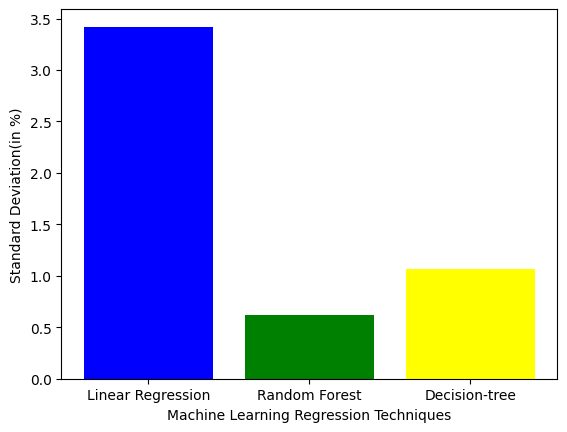

<Figure size 640x480 with 0 Axes>

In [ ]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt

# create a dataset
Algorithms = ['Linear Regression','Random Forest', 'Decision-tree']
Accuracy = [b, b1, b2]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=['blue', 'green','yellow'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('Standard Deviation(in %)')
plt.xlabel('Machine Learning Regression Techniques')

# Show graph
plt.show()
plt.savefig('SD.png')

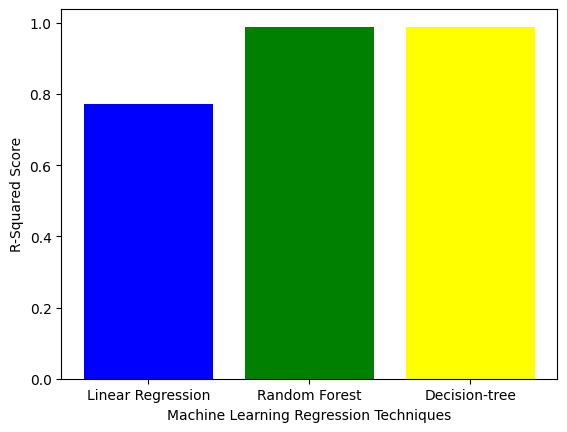

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# create a dataset
Algorithms = ['Linear Regression','Random Forest', 'Decision-tree']
Accuracy = [r, r1, r2]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=['blue', 'green','yellow'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('R-Squared Score')
plt.xlabel('Machine Learning Regression Techniques')

# Show graph
plt.show()
plt.savefig('SD.png')

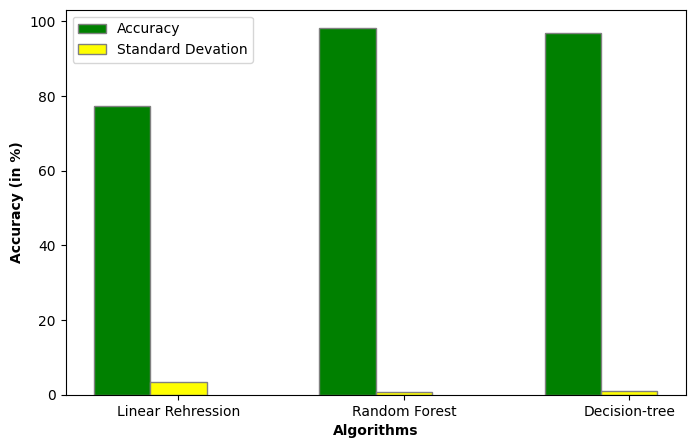

In [ ]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(8, 5))

# set height of bar
Algorithms = ['Linear Rehression','Random Forest', 'Decision-tree']
Accuracy = [a, a1, a2]
Standard_Deviation = [b, b1,b2]

# Set position of bar on X axis
br1 = np.arange(len(Accuracy))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, Accuracy, color ='green', width = barWidth,
        edgecolor ='grey', label ='Accuracy')
plt.bar(br2, Standard_Deviation, color ='yellow', width = barWidth,
        edgecolor ='grey', label ='Standard Devation')

# Adding Xticks
plt.xlabel('Algorithms', fontweight ='bold', fontsize = 10)
plt.ylabel('Accuracy (in %)', fontweight ='bold', fontsize = 10)
plt.xticks([r + barWidth for r in range(len(Accuracy))],
        Algorithms)

plt.legend()
plt.show()

In [ ]:
# Mean Accuracy and SD of 10 fold results
print("Linear Regression Model:")
print("\tAccuracy : {:.2f}%".format (a))
print("\nDecision Tree Model:")
print("\tAccuracy : {:.2f}%".format (a2))
print("\nRandom Forrest Model:")
print("\tAccuracy : {:.2f}%".format (a1))

Linear Regression Model:
	Accuracy : 77.23%

Decision Tree Model:
	Accuracy : 96.92%

Random Forrest Model:
	Accuracy : 98.15%
